In [6]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.helper_func import *
import socket

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.3, rc={"lines.linewidth": 2.5})

In [8]:
socket.gethostname()

'CC-M133A-EU.local'

In [9]:
class Metrics:
    def __init__(self, time_gap, results_files, params_files, skmob_files_path):
        self.time_gap = time_gap
        self.results_files = results_files
        self.params_files = params_files
        self.skmob_files_path = skmob_files_path

    def classicalMetrics(self):
        results_ids = [f.split('_')[3].split('.')[0] for f in self.results_files]
        params_ids = [f.split('_')[2].split('.')[0] for f in self.params_files]

        self.mtgp_mae = np.array([])
        self.mtgp_rmse = np.array([])
        self.mtgp_mad = np.array([])
        self.mtgp_mape = np.array([])
        self.mtgp_maxape = np.array([])
        self.mtgp_tape = np.array([])
        self.mtgp_df = np.array([])
        self.mtgp_area = np.array([])
        self.mtgp_dtw = np.array([])
        self.rbf_mae = np.array([])
        self.rbf_rmse = np.array([])
        self.rbf_mad = np.array([])
        self.rbf_mape = np.array([])
        self.rbf_maxape = np.array([])
        self.rbf_tape = np.array([])
        self.rbf_df = np.array([])
        self.rbf_area = np.array([])
        self.rbf_dtw = np.array([])
        self.ses_mae = np.array([])
        self.ses_rmse = np.array([])
        self.ses_mad = np.array([])
        self.ses_mape = np.array([])
        self.ses_maxape = np.array([])
        self.ses_tape = np.array([])
        self.ses_df = np.array([])
        self.ses_area = np.array([])
        self.ses_dtw = np.array([])
        self.holt_mae = np.array([])
        self.holt_rmse = np.array([])
        self.holt_mad = np.array([])
        self.holt_mape = np.array([])
        self.holt_maxape = np.array([])
        self.holt_tape = np.array([])
        self.holt_df = np.array([])
        self.holt_area = np.array([])
        self.holt_dtw = np.array([])
        self.es_mae = np.array([])
        self.es_rmse = np.array([])
        self.es_mad = np.array([])
        self.es_mape = np.array([])
        self.es_maxape = np.array([])
        self.es_tape = np.array([])
        self.es_df = np.array([])
        self.es_area = np.array([])
        self.es_dtw = np.array([])
        self.arima_mae = np.array([])
        self.arima_rmse = np.array([])
        self.arima_mad = np.array([])
        self.arima_mape = np.array([])
        self.arima_maxape = np.array([])
        self.arima_tape = np.array([])
        self.arima_df = np.array([])
        self.arima_area = np.array([])
        self.arima_dtw = np.array([])
        self.sarima_mae = np.array([])
        self.sarima_rmse = np.array([])
        self.sarima_mad = np.array([])
        self.sarima_mape = np.array([])
        self.sarima_maxape = np.array([])
        self.sarima_tape = np.array([])
        self.sarima_df = np.array([])
        self.sarima_area = np.array([])
        self.sarima_dtw = np.array([])
        self.new_ocp = np.array([])
        self.init_lengthscale = np.array([])
        self.bic = np.array([])
            
        # Loop through each unique identifier and read corresponding files
        for id in set(results_ids):
            if socket.gethostname() == 'CC-M133A-EU.local':
                result_file = '/Users/ekino/Desktop/OneDrive - UW/GPR/Sept_Results/{}/all_results/results_{}.csv'.format(self.time_gap, id)
                params_file = '/Users/ekino/Desktop/OneDrive - UW/GPR/Sept_Results/{}/all_parameters/params_{}.csv'.format(self.time_gap, id)
            else:
                result_file = 'C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\{}\\all_results\\results_{}.csv'.format(self.time_gap, id)
                params_file = 'C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\{}\\all_parameters\\params_{}.csv'.format(self.time_gap, id)
                
            # Read both files
            res = pd.read_csv(result_file, header=0)
            par = pd.read_csv(params_file, header=0)
            par.columns = ['param', 'value']

            self.mtgp_mae = np.append(self.mtgp_mae, res['MAE'][0])
            self.mtgp_rmse = np.append(self.mtgp_rmse, res['RMSE'][0])
            self.mtgp_mad = np.append(self.mtgp_mad, res['MAD'][0])
            self.mtgp_mape = np.append(self.mtgp_mape, res['MAPE'][0])
            self.mtgp_maxape = np.append(self.mtgp_maxape, res['MAXAPE'][0])
            self.mtgp_tape = np.append(self.mtgp_tape, res['TAPE'][0])
            self.mtgp_df = np.append(self.mtgp_df, res['DF'][0])
            self.mtgp_area = np.append(self.mtgp_area, res['AREA'][0])
            self.mtgp_dtw = np.append(self.mtgp_dtw, res['DTW'][0])
            self.rbf_mae = np.append(self.rbf_mae, res['MAE'][1])
            self.rbf_rmse = np.append(self.rbf_rmse, res['RMSE'][1])
            self.rbf_mad = np.append(self.rbf_mad, res['MAD'][1])
            self.rbf_mape = np.append(self.rbf_mape, res['MAPE'][1])  
            self.rbf_maxape = np.append(self.rbf_maxape, res['MAXAPE'][1])
            self.rbf_tape = np.append(self.rbf_tape, res['TAPE'][1])
            self.rbf_df = np.append(self.rbf_df, res['DF'][1])
            self.rbf_area = np.append(self.rbf_area, res['AREA'][1])
            self.rbf_dtw = np.append(self.rbf_dtw, res['DTW'][1])
            self.ses_mae = np.append(self.ses_mae, res['MAE'][2])
            self.ses_rmse = np.append(self.ses_rmse, res['RMSE'][2])
            self.ses_mad = np.append(self.ses_mad, res['MAD'][2])
            self.ses_mape = np.append(self.ses_mape, res['MAPE'][2])
            self.ses_maxape = np.append(self.ses_maxape, res['MAXAPE'][2])
            self.ses_tape = np.append(self.ses_tape, res['TAPE'][2])
            self.ses_df = np.append(self.ses_df, res['DF'][2])
            self.ses_area = np.append(self.ses_area, res['AREA'][2])
            self.ses_dtw = np.append(self.ses_dtw, res['DTW'][2])
            self.holt_mae = np.append(self.holt_mae, res['MAE'][3])
            self.holt_rmse = np.append(self.holt_rmse, res['RMSE'][3])
            self.holt_mad = np.append(self.holt_mad, res['MAD'][3])
            self.holt_mape = np.append(self.holt_mape, res['MAPE'][3])
            self.holt_maxape = np.append(self.holt_maxape, res['MAXAPE'][3])
            self.holt_tape = np.append(self.holt_tape, res['TAPE'][3])
            self.holt_df = np.append(self.holt_df, res['DF'][3])
            self.holt_area = np.append(self.holt_area, res['AREA'][3])
            self.holt_dtw = np.append(self.holt_dtw, res['DTW'][3])
            self.es_mae = np.append(self.es_mae, res['MAE'][4])
            self.es_rmse = np.append(self.es_rmse, res['RMSE'][4])
            self.es_mad = np.append(self.es_mad, res['MAD'][4])
            self.es_mape = np.append(self.es_mape, res['MAPE'][4])
            self.es_maxape = np.append(self.es_maxape, res['MAXAPE'][4])
            self.es_tape = np.append(self.es_tape, res['TAPE'][4])
            self.es_df = np.append(self.es_df, res['DF'][4])
            self.es_area = np.append(self.es_area, res['AREA'][4])
            self.es_dtw = np.append(self.es_dtw, res['DTW'][4])
            self.arima_mae = np.append(self.arima_mae, res['MAE'][5])
            self.arima_rmse = np.append(self.arima_rmse, res['RMSE'][5])
            self.arima_mad = np.append(self.arima_mad, res['MAD'][5])
            self.arima_mape = np.append(self.arima_mape, res['MAPE'][5])
            self.arima_maxape = np.append(self.arima_maxape, res['MAXAPE'][5])
            self.arima_tape = np.append(self.arima_tape, res['TAPE'][5])
            self.arima_df = np.append(self.arima_df, res['DF'][5])
            self.arima_area = np.append(self.arima_area, res['AREA'][5])
            self.arima_dtw = np.append(self.arima_dtw, res['DTW'][5])
            self.sarima_mae = np.append(self.sarima_mae, res['MAE'][6])
            self.sarima_rmse = np.append(self.sarima_rmse, res['RMSE'][6])
            self.sarima_mad = np.append(self.sarima_mad, res['MAD'][6])
            self.sarima_mape = np.append(self.sarima_mape, res['MAPE'][6])
            self.sarima_maxape = np.append(self.sarima_maxape, res['MAXAPE'][6])
            self.sarima_tape = np.append(self.sarima_tape, res['TAPE'][6])
            self.sarima_df = np.append(self.sarima_df, res['DF'][6])
            self.sarima_area = np.append(self.sarima_area, res['AREA'][6])
            self.sarima_dtw = np.append(self.sarima_dtw, res['DTW'][6])
            self.new_ocp = np.append(self.new_ocp, par[par['param'] == 'new_ocp'].value.astype(float))
            self.init_lengthscale = np.append(self.init_lengthscale, par[par['param'] == 'init_lengthscale'].value.astype(float))
            self.bic = np.append(self.bic, par[par['param'] == 'bic'].value.astype(float))
        
    def skmobMetrics(self):  
        
        os.chdir(self.skmob_files_path)

        self.mtgp_rec = np.array([])
        self.mtgp_freq = np.array([])
        self.mtgp_no_loc = np.array([])
        self.mtgp_k_rg = np.array([])
        self.mtgp_spat_burst = np.array([])
        self.mtgp_dist_straight = np.array([])
        self.mtgp_rand_entr = np.array([])
        self.mtgp_real_entr = np.array([])
        self.mtgp_uncorr_entr = np.array([])
        self.mtgp_rbf_rec = np.array([])
        self.mtgp_rbf_freq = np.array([])
        self.mtgp_rbf_no_loc = np.array([])
        self.mtgp_rbf_k_rg = np.array([])
        self.mtgp_rbf_spat_burst = np.array([])
        self.mtgp_rbf_dist_straight = np.array([])
        self.mtgp_rbf_rand_entr = np.array([])
        self.mtgp_rbf_real_entr = np.array([])
        self.mtgp_rbf_uncorr_entr = np.array([])
        self.ses_rec = np.array([])
        self.ses_freq = np.array([])
        self.ses_no_loc = np.array([])
        self.ses_k_rg = np.array([])
        self.ses_spat_burst = np.array([])
        self.ses_dist_straight = np.array([])
        self.ses_rand_entr = np.array([])
        self.ses_real_entr = np.array([])
        self.ses_uncorr_entr = np.array([])
        self.holt_rec = np.array([])
        self.holt_freq = np.array([])
        self.holt_no_loc = np.array([])
        self.holt_k_rg = np.array([])
        self.holt_spat_burst = np.array([])
        self.holt_dist_straight = np.array([])
        self.holt_rand_entr = np.array([])
        self.holt_real_entr = np.array([])
        self.holt_uncorr_entr = np.array([])
        self.es_rec = np.array([])
        self.es_freq = np.array([])
        self.es_no_loc = np.array([])
        self.es_k_rg = np.array([])
        self.es_spat_burst = np.array([])
        self.es_dist_straight = np.array([])
        self.es_rand_entr = np.array([])
        self.es_real_entr = np.array([])
        self.es_uncorr_entr = np.array([])
        self.arima_rec = np.array([])
        self.arima_freq = np.array([])
        self.arima_no_loc = np.array([])
        self.arima_k_rg = np.array([])
        self.arima_spat_burst = np.array([])
        self.arima_dist_straight = np.array([])
        self.arima_rand_entr = np.array([])
        self.arima_real_entr = np.array([])
        self.arima_uncorr_entr = np.array([])
        self.sarima_rec = np.array([])
        self.sarima_freq = np.array([])
        self.sarima_no_loc = np.array([])
        self.sarima_k_rg = np.array([])
        self.sarima_spat_burst = np.array([])
        self.sarima_dist_straight = np.array([])
        self.sarima_rand_entr = np.array([])
        self.sarima_real_entr = np.array([])
        self.sarima_uncorr_entr = np.array([])
        self.li_rec = np.array([])
        self.li_freq = np.array([])
        self.li_no_loc = np.array([])
        self.li_k_rg = np.array([])
        self.li_spat_burst = np.array([])
        self.li_dist_straight = np.array([])
        self.li_rand_entr = np.array([])
        self.li_real_entr = np.array([])
        self.li_uncorr_entr = np.array([])


        for file in glob.glob("*.csv"):
            res = pd.read_csv(file, header=0)
            # Store each metric in a numpy array
            self.mtgp_rec = np.append(self.mtgp_rec, res['recency'][0])
            self.mtgp_freq = np.append(self.mtgp_freq, res['freq_rank'][0])
            self.mtgp_no_loc = np.append(self.mtgp_no_loc, res['no_loc_error'][0])
            self.mtgp_k_rg = np.append(self.mtgp_k_rg, res['k_rg_error'][0])
            self.mtgp_spat_burst = np.append(self.mtgp_spat_burst, res['spat_burst_error'][0])
            self.mtgp_dist_straight = np.append(self.mtgp_dist_straight, res['dist_straight_error'][0])
            self.mtgp_rand_entr = np.append(self.mtgp_rand_entr, res['rand_entr_error'][0])
            self.mtgp_real_entr = np.append(self.mtgp_real_entr, res['real_entr_error'][0])
            self.mtgp_uncorr_entr = np.append(self.mtgp_uncorr_entr, res['uncorr_entr_error'][0])
            self.mtgp_rbf_rec = np.append(self.mtgp_rbf_rec, res['recency'][1])
            self.mtgp_rbf_freq = np.append(self.mtgp_rbf_freq, res['freq_rank'][1])
            self.mtgp_rbf_no_loc = np.append(self.mtgp_rbf_no_loc, res['no_loc_error'][1])
            self.mtgp_rbf_k_rg = np.append(self.mtgp_rbf_k_rg, res['k_rg_error'][1])
            self.mtgp_rbf_spat_burst = np.append(self.mtgp_rbf_spat_burst, res['spat_burst_error'][1])
            self.mtgp_rbf_dist_straight = np.append(self.mtgp_rbf_dist_straight, res['dist_straight_error'][1])
            self.mtgp_rbf_rand_entr = np.append(self.mtgp_rbf_rand_entr, res['rand_entr_error'][1])
            self.mtgp_rbf_real_entr = np.append(self.mtgp_rbf_real_entr, res['real_entr_error'][1])
            self.mtgp_rbf_uncorr_entr = np.append(self.mtgp_rbf_uncorr_entr, res['uncorr_entr_error'][1])
            self.ses_rec = np.append(self.ses_rec, res['recency'][2])
            self.ses_freq = np.append(self.ses_freq, res['freq_rank'][2])
            self.ses_no_loc = np.append(self.ses_no_loc, res['no_loc_error'][2])
            self.ses_k_rg = np.append(self.ses_k_rg, res['k_rg_error'][2])
            self.ses_spat_burst = np.append(self.ses_spat_burst, res['spat_burst_error'][2])
            self.ses_dist_straight = np.append(self.ses_dist_straight, res['dist_straight_error'][2])
            self.ses_rand_entr = np.append(self.ses_rand_entr, res['rand_entr_error'][2])
            self.ses_real_entr = np.append(self.ses_real_entr, res['real_entr_error'][2])
            self.ses_uncorr_entr = np.append(self.ses_uncorr_entr, res['uncorr_entr_error'][2])
            self.holt_rec = np.append(self.holt_rec, res['recency'][3])
            self.holt_freq = np.append(self.holt_freq, res['freq_rank'][3])
            self.holt_no_loc = np.append(self.holt_no_loc, res['no_loc_error'][3])
            self.holt_k_rg = np.append(self.holt_k_rg, res['k_rg_error'][3])
            self.holt_spat_burst = np.append(self.holt_spat_burst, res['spat_burst_error'][3])
            self.holt_dist_straight = np.append(self.holt_dist_straight, res['dist_straight_error'][3])
            self.holt_rand_entr = np.append(self.holt_rand_entr, res['rand_entr_error'][3])
            self.holt_real_entr = np.append(self.holt_real_entr, res['real_entr_error'][3])
            self.holt_uncorr_entr = np.append(self.holt_uncorr_entr, res['uncorr_entr_error'][3])
            self.es_rec = np.append(self.es_rec, res['recency'][4])
            self.es_freq = np.append(self.es_freq, res['freq_rank'][4])
            self.es_no_loc = np.append(self.es_no_loc, res['no_loc_error'][4])
            self.es_k_rg = np.append(self.es_k_rg, res['k_rg_error'][4])
            self.es_spat_burst = np.append(self.es_spat_burst, res['spat_burst_error'][4])
            self.es_dist_straight = np.append(self.es_dist_straight, res['dist_straight_error'][4])
            self.es_rand_entr = np.append(self.es_rand_entr, res['rand_entr_error'][4])
            self.es_real_entr = np.append(self.es_real_entr, res['real_entr_error'][4])
            self.es_uncorr_entr = np.append(self.es_uncorr_entr, res['uncorr_entr_error'][4])
            self.arima_rec = np.append(self.arima_rec, res['recency'][5])
            self.arima_freq = np.append(self.arima_freq, res['freq_rank'][5])
            self.arima_no_loc = np.append(self.arima_no_loc, res['no_loc_error'][5])
            self.arima_k_rg = np.append(self.arima_k_rg, res['k_rg_error'][5])
            self.arima_spat_burst = np.append(self.arima_spat_burst, res['spat_burst_error'][5])
            self.arima_dist_straight = np.append(self.arima_dist_straight, res['dist_straight_error'][5])
            self.arima_rand_entr = np.append(self.arima_rand_entr, res['rand_entr_error'][5])
            self.arima_real_entr = np.append(self.arima_real_entr, res['real_entr_error'][5])
            self.arima_uncorr_entr = np.append(self.arima_uncorr_entr, res['uncorr_entr_error'][5])
            self.sarima_rec = np.append(self.sarima_rec, res['recency'][6])
            self.sarima_freq = np.append(self.sarima_freq, res['freq_rank'][6])
            self.sarima_no_loc = np.append(self.sarima_no_loc, res['no_loc_error'][6])
            self.sarima_k_rg = np.append(self.sarima_k_rg, res['k_rg_error'][6])
            self.sarima_spat_burst = np.append(self.sarima_spat_burst, res['spat_burst_error'][6])
            self.sarima_dist_straight = np.append(self.sarima_dist_straight, res['dist_straight_error'][6])
            self.sarima_rand_entr = np.append(self.sarima_rand_entr, res['rand_entr_error'][6])
            self.sarima_real_entr = np.append(self.sarima_real_entr, res['real_entr_error'][6])
            self.sarima_uncorr_entr = np.append(self.sarima_uncorr_entr, res['uncorr_entr_error'][6])
            self.li_rec = np.append(self.li_rec, res['recency'][7])
            self.li_freq = np.append(self.li_freq, res['freq_rank'][7])
            self.li_no_loc = np.append(self.li_no_loc, res['no_loc_error'][7])
            self.li_k_rg = np.append(self.li_k_rg, res['k_rg_error'][7])
            self.li_spat_burst = np.append(self.li_spat_burst, res['spat_burst_error'][7])
            self.li_dist_straight = np.append(self.li_dist_straight, res['dist_straight_error'][7])
            self.li_rand_entr = np.append(self.li_rand_entr, res['rand_entr_error'][7])
            self.li_real_entr = np.append(self.li_real_entr, res['real_entr_error'][7])
            self.li_uncorr_entr = np.append(self.li_uncorr_entr, res['uncorr_entr_error'][7])


In [10]:
results_files = glob.glob('C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\10080\\all_results\\results_*.csv')
params_files = glob.glob('C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\10080\\all_parameters\\params_*.csv')
skmob_files = 'C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\10080\\all_skmob_metrics\\'

metrics_10080 = Metrics(10080, results_files, params_files, skmob_files)
metrics_10080.classicalMetrics()
metrics_10080.skmobMetrics()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\10080\\all_skmob_metrics\\'

AttributeError: 'Metrics' object has no attribute 'mtgp_no_loc'

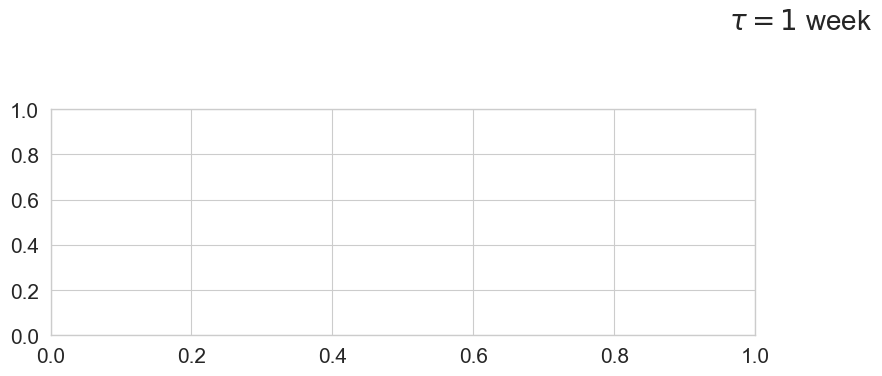

In [5]:
# Make a boxplot of each metric for each model, allow extra kwargs for ylim
def plotClassicalMetrics(metrics, time_gap, **kwargs):
    plt.figure(figsize=(15, 5))
     # Increase x-axis tick font size
    plt.rc('xtick', labelsize=10)
    
    # Increase y-axis tick font size
    plt.rc('ytick', labelsize=10)
   
    plt.suptitle(time_gap, fontsize=20)
    plt.subplot(2, 3, 1)

    plt.boxplot([metrics.mtgp_mae, metrics.rbf_mae, metrics.ses_mae, metrics.holt_mae, metrics.es_mae, metrics.arima_mae, metrics.sarima_mae])
    plt.title('MAE', fontsize=16)
    plt.xticks([1, 2, 3, 4, 5, 6, 7], [r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'], rotation=15)
    plt.subplot(2, 3, 2)
    plt.boxplot([metrics.mtgp_rmse, metrics.rbf_rmse, metrics.ses_rmse, metrics.holt_rmse, metrics.es_rmse, metrics.arima_rmse, metrics.sarima_rmse])
    plt.title('RMSE', fontsize=16)
    plt.xticks([1, 2, 3, 4, 5, 6, 7], [r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'], rotation=15)
    plt.subplot(2, 3, 3)
    plt.boxplot([metrics.mtgp_mad, metrics.rbf_mad, metrics.ses_mad, metrics.holt_mad, metrics.es_mad, metrics.arima_mad, metrics.sarima_mad])
    plt.title('MAD', fontsize=16)
    plt.xticks([1, 2, 3, 4, 5, 6, 7], [r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'], rotation=15)
    plt.subplot(2, 3, 4)
    plt.boxplot([metrics.mtgp_df, metrics.rbf_df, metrics.ses_df, metrics.holt_df, metrics.es_df, metrics.arima_df, metrics.sarima_df])
    plt.title('DF', fontsize=16)
    plt.xticks([1, 2, 3, 4, 5, 6, 7], [r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'], rotation=15)
    plt.subplot(2, 3, 5)
    plt.boxplot([metrics.mtgp_area, metrics.rbf_area, metrics.ses_area, metrics.holt_area, metrics.es_area, metrics.arima_area, metrics.sarima_area])
    plt.title('AREA', fontsize=16)
    plt.xticks([1, 2, 3, 4, 5, 6, 7], [r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'], rotation=15)
    plt.subplot(2, 3, 6)
    plt.boxplot([metrics.mtgp_dtw, metrics.rbf_dtw, metrics.ses_dtw, metrics.holt_dtw, metrics.es_dtw, metrics.arima_dtw, metrics.sarima_dtw])
    plt.title('DTW', fontsize=16)
    plt.xticks([1, 2, 3, 4, 5, 6, 7], [r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'], rotation=15)
    if kwargs:
        plt.ylim(kwargs['ylim'])
    plt.tight_layout()
    plt.show()

# Visualize the rest of the metrics in the same subplots
# Three rows, two columns
def plotSkmobMetrics(metrics, time_gap, **kwargs):
    plt.figure(figsize=(20, 10))
     # Increase x-axis tick font size
    plt.rc('xtick', labelsize=15)
    
    # Increase y-axis tick font size
    plt.rc('ytick', labelsize=15)
   
    plt.suptitle(time_gap, fontsize=20)
    plt.subplot(3, 2, 1)
    plt.boxplot([metrics.mtgp_no_loc, metrics.mtgp_rbf_no_loc, metrics.ses_no_loc, metrics.holt_no_loc, metrics.es_no_loc, metrics.arima_no_loc, metrics.sarima_no_loc], labels=[r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'])
    plt.title('Number of Significant Locations Error', fontsize=20)

    plt.subplot(3, 2, 2)
    plt.ylim(-10, 10)
    plt.boxplot([metrics.mtgp_k_rg, metrics.mtgp_rbf_k_rg, metrics.ses_k_rg, metrics.holt_k_rg, metrics.es_k_rg, metrics.arima_k_rg, metrics.sarima_k_rg], labels=[r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'])
    plt.title('Radius of Gyration Error', fontsize=20)

    plt.subplot(3, 2, 3)
    plt.boxplot([metrics.mtgp_dist_straight, metrics.mtgp_rbf_dist_straight, metrics.ses_dist_straight, metrics.holt_dist_straight, metrics.es_dist_straight, metrics.arima_dist_straight, metrics.sarima_dist_straight], labels=[r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'])
    plt.title('Straight Line Travel Distance Error', fontsize=20)

    plt.subplot(3, 2, 4)
    plt.boxplot([metrics.mtgp_rand_entr, metrics.mtgp_rbf_rand_entr, metrics.ses_rand_entr, metrics.holt_rand_entr, metrics.es_rand_entr, metrics.arima_rand_entr, metrics.sarima_rand_entr], labels=[r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'])
    plt.title('Random Entropy Error', fontsize=20)

    plt.subplot(3, 2, 5)
    plt.boxplot([metrics.mtgp_real_entr, metrics.mtgp_rbf_real_entr, metrics.ses_real_entr, metrics.holt_real_entr, metrics.es_real_entr, metrics.arima_real_entr, metrics.sarima_real_entr], labels=[r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'])
    plt.title('Real Entropy Error', fontsize=20)

    plt.subplot(3, 2, 6)
    plt.boxplot([metrics.mtgp_uncorr_entr, metrics.mtgp_rbf_uncorr_entr, metrics.ses_uncorr_entr, metrics.holt_uncorr_entr, metrics.es_uncorr_entr, metrics.arima_uncorr_entr, metrics.sarima_uncorr_entr], labels=[r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'])
    plt.title('Uncorrelated Entropy Error', fontsize=20)

    if kwargs:
        plt.ylim(kwargs['ylim'])

   

    plt.tight_layout()
    plt.show()
    

plotSkmobMetrics(metrics_10080, r'$\tau = 1$ week')

plotClassicalMetrics(metrics_10080, r'$\tau = 1$ week')

In [ ]:
def plotTempOcpvsError(error, ocp, fitline=True, title=None, xlabel='Temporal occupancy', ylabel='Error', figsize=(8,6), **kwargs):
    '''
    Plot temporal occupancy vs error
    Args:
        error: float numpy array of error values
        ocp: float numpy array of temporal occupancy values
        fitline: boolean, whether to fit a line to the data
        title: string, title of the plot
        xlabel: string, label of the x-axis
        ylabel: string, label of the y-axis
        figsize: tuple, size of the figure
        **kwargs: keyword arguments for plt.scatter
    Returns:
        None
    '''
    plt.figure(figsize=figsize)
    plt.scatter(ocp, error, **kwargs)
    if fitline:
        m, b = np.polyfit(ocp, error, 1)
        x = np.linspace(min(ocp), max(ocp), 100)
        plt.plot(x, m*x + b, label='MTGP')
    if title is not None:
        plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    # X-tick font size
    plt.xticks(fontsize=14)
    # Y-tick font size
    plt.yticks(fontsize=14)
    plt.show()

plotTempOcpvsError(metrics_10080.mtgp_dtw, metrics_10080.new_ocp, fitline=True, title=r'$\tau = 1$ week', xlabel='Temporal occupancy', ylabel='DTW', figsize=(8,6), c='b', marker='o', label='MTGP')

In [ ]:
results_files = glob.glob('C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\1440\\all_results\\results_*.csv')
params_files = glob.glob('C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\1440\\all_parameters\\params_*.csv')
skmob_files = 'C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\1440\\all_skmob_metrics\\'

metrics_1440 = Metrics(1440, results_files, params_files, skmob_files)
metrics_1440.classicalMetrics()
metrics_1440.skmobMetrics()

plotClassicalMetrics(metrics_1440, r'$\tau = 1$ day')

plotSkmobMetrics(metrics_1440, r'$\tau = 1$ day')

In [ ]:
plotTempOcpvsError(metrics_1440.mtgp_dtw, metrics_1440.new_ocp, fitline=True, title=r'$\tau = 1$ day', xlabel='Temporal occupancy', ylabel='DTW', figsize=(8,6), c='b', marker='o', label='MTGP')

In [ ]:
results_files = glob.glob('C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\360\\all_results\\results_*.csv')
params_files = glob.glob('C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\360\\all_parameters\\params_*.csv')
skmob_files = 'C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\360\\all_skmob_metrics\\'

metrics_360 = Metrics(360, results_files, params_files, skmob_files)
metrics_360.classicalMetrics()
metrics_360.skmobMetrics()

plotClassicalMetrics(metrics_360, r'$\tau = 6$ hours')

plotSkmobMetrics(metrics_360, r'$\tau = 6$ hours')

In [ ]:
plotTempOcpvsError(metrics_360.mtgp_dtw, metrics_360.new_ocp, fitline=True, title=r'$\tau = 6$ hours', xlabel='Temporal occupancy', ylabel='DTW', figsize=(8,6), c='b', marker='o', label='MTGP')

In [ ]:
results_files = glob.glob('C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\60\\all_results\\results_*.csv')
params_files = glob.glob('C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\60\\all_parameters\\params_*.csv')
skmob_files = 'C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\60\\all_skmob_metrics\\'

metrics_60 = Metrics(60, results_files, params_files, skmob_files)
metrics_60.classicalMetrics()
metrics_60.skmobMetrics()

def plotClassicalMetrics60(metrics, time_gap):
    plt.figure(figsize=(15, 5))
# Increase x-axis tick font size
    plt.rc('xtick', labelsize=10)

# Increase y-axis tick font size
    plt.rc('ytick', labelsize=10)

    plt.suptitle(time_gap, fontsize=20)
    plt.subplot(2, 3, 1)
    plt.ylim((0, 2))
    plt.boxplot([metrics.mtgp_mae, metrics.rbf_mae, metrics.ses_mae, metrics.holt_mae, metrics.es_mae, metrics.arima_mae, metrics.sarima_mae])
    plt.title('MAE', fontsize=16)
    plt.xticks([1, 2, 3, 4, 5, 6, 7], [r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'], rotation=15)
    plt.subplot(2, 3, 2)
    plt.ylim((0, 5))
    plt.boxplot([metrics.mtgp_rmse, metrics.rbf_rmse, metrics.ses_rmse, metrics.holt_rmse, metrics.es_rmse, metrics.arima_rmse, metrics.sarima_rmse])
    plt.title('RMSE', fontsize=16)
    plt.xticks([1, 2, 3, 4, 5, 6, 7], [r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'], rotation=15)
    plt.subplot(2, 3, 3)
    plt.ylim((-0.2, 5))
    plt.boxplot([metrics.mtgp_mad, metrics.rbf_mad, metrics.ses_mad, metrics.holt_mad, metrics.es_mad, metrics.arima_mad, metrics.sarima_mad])
    plt.title('MAD', fontsize=16)
    plt.xticks([1, 2, 3, 4, 5, 6, 7], [r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'], rotation=15)
    plt.subplot(2, 3, 4)
    plt.ylim((0, 15))
    plt.boxplot([metrics.mtgp_df, metrics.rbf_df, metrics.ses_df, metrics.holt_df, metrics.es_df, metrics.arima_df, metrics.sarima_df])
    plt.title('DF', fontsize=16)
    plt.xticks([1, 2, 3, 4, 5, 6, 7], [r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'], rotation=15)
    plt.subplot(2, 3, 5)
    plt.ylim((0, 200000))
    plt.boxplot([metrics.mtgp_area, metrics.rbf_area, metrics.ses_area, metrics.holt_area, metrics.es_area, metrics.arima_area, metrics.sarima_area])
    plt.title('AREA', fontsize=16)
    plt.xticks([1, 2, 3, 4, 5, 6, 7], [r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'], rotation=15)
    plt.subplot(2, 3, 6)
    plt.boxplot([metrics.mtgp_dtw, metrics.rbf_dtw, metrics.ses_dtw, metrics.holt_dtw, metrics.es_dtw, metrics.arima_dtw, metrics.sarima_dtw])
    plt.title('DTW', fontsize=16)
    plt.xticks([1, 2, 3, 4, 5, 6, 7], [r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'], rotation=15)
    plt.ylim((-50, 5000))
    plt.tight_layout()
    plt.show()


plotClassicalMetrics60(metrics_60, r'$\tau = 1$ hour')

#plotClassicalMetrics(metrics_60, r'$\tau = 1$ hour')

plotSkmobMetrics(metrics_60, r'$\tau = 1$ hour')

In [ ]:
plotTempOcpvsError(metrics_60.mtgp_mae, metrics_60.new_ocp, fitline=True, title=r'$\tau = 1$ hour', xlabel='Temporal occupancy', ylabel='MAE', figsize=(8,6), c='b', marker='o', label='MTGP')

In [ ]:
results_files = glob.glob('C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\30\\all_results\\results_*.csv')
params_files = glob.glob('C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\30\\all_parameters\\params_*.csv')
skmob_files = 'C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\30\\all_skmob_metrics\\'

metrics_30 = Metrics(30, results_files, params_files, skmob_files)
metrics_30.classicalMetrics()
metrics_30.skmobMetrics()

plotClassicalMetrics(metrics_30, r'$\tau = 30$ minutes')

plotSkmobMetrics(metrics_30, r'$\tau = 30$ minutes')

In [ ]:
plotTempOcpvsError(metrics_30.mtgp_dtw, metrics_30.new_ocp, fitline=True, title=r'$\tau = 30$ minutes', xlabel='Temporal occupancy', ylabel='DTW', figsize=(8,6), c='b', marker='o', label='MTGP')

In [ ]:
results_files = glob.glob('C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\15\\all_results\\results_*.csv')
params_files = glob.glob('C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\15\\all_parameters\\params_*.csv')
skmob_files = 'C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\15\\all_skmob_metrics\\'

metrics_15 = Metrics(15, results_files, params_files, skmob_files)
metrics_15.classicalMetrics()
metrics_15.skmobMetrics()

# Reduce font size
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

plt.figure(figsize=(15, 5))
plt.suptitle(r'$\tau = 15$ minutes', fontsize=20)
plt.subplot(2, 3, 1)
plt.ylim(0, 5)
plt.boxplot([metrics_15.mtgp_mae, metrics_15.rbf_mae, metrics_15.ses_mae, metrics_15.holt_mae, metrics_15.es_mae, metrics_15.arima_mae, metrics_15.sarima_mae])
plt.title('MAE', fontsize=16)
plt.xticks([1, 2, 3, 4, 5, 6, 7], [r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'], rotation=15)
plt.subplot(2, 3, 2)
plt.ylim(0, 5)
plt.boxplot([metrics_15.mtgp_rmse, metrics_15.rbf_rmse, metrics_15.ses_rmse, metrics_15.holt_rmse, metrics_15.es_rmse, metrics_15.arima_rmse, metrics_15.sarima_rmse])
plt.title('RMSE', fontsize=16)
plt.xticks([1, 2, 3, 4, 5, 6, 7], [r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'], rotation=15)
plt.subplot(2, 3, 3)
plt.ylim(0, 5)
plt.boxplot([metrics_15.mtgp_mad, metrics_15.rbf_mad, metrics_15.ses_mad, metrics_15.holt_mad, metrics_15.es_mad, metrics_15.arima_mad, metrics_15.sarima_mad])
plt.title('MAD', fontsize=16)
plt.xticks([1, 2, 3, 4, 5, 6, 7], [r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'], rotation=15)
plt.subplot(2, 3, 4)
plt.ylim(0, 10)
plt.boxplot([metrics_15.mtgp_df, metrics_15.rbf_df, metrics_15.ses_df, metrics_15.holt_df, metrics_15.es_df, metrics_15.arima_df, metrics_15.sarima_df])
plt.title('DF', fontsize=16)
plt.xticks([1, 2, 3, 4, 5, 6, 7], [r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'], rotation=15)
plt.subplot(2, 3, 5)
plt.ylim(0, 150000)
plt.boxplot([metrics_15.mtgp_area, metrics_15.rbf_area, metrics_15.ses_area, metrics_15.holt_area, metrics_15.es_area, metrics_15.arima_area, metrics_15.sarima_area])
plt.title('AREA', fontsize=16)
plt.xticks([1, 2, 3, 4, 5, 6, 7], [r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'], rotation=15)
plt.subplot(2, 3, 6)
plt.ylim(0, 5000)
plt.boxplot([metrics_15.mtgp_dtw, metrics_15.rbf_dtw, metrics_15.ses_dtw, metrics_15.holt_dtw, metrics_15.es_dtw, metrics_15.arima_dtw, metrics_15.sarima_dtw])
plt.title('DTW', fontsize=16)
plt.xticks([1, 2, 3, 4, 5, 6, 7], [r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'], rotation=15)

plt.tight_layout()
plt.show()

In [ ]:
plotSkmobMetrics(metrics_15, r'$\tau = 15$ minutes')

In [ ]:
plotTempOcpvsError(metrics_15.mtgp_dtw, metrics_15.new_ocp, fitline=True, title=r'$\tau = 15$ minutes', xlabel='Temporal occupancy', ylabel='DTW', figsize=(8,6), c='b', marker='o', label='MTGP')

In [ ]:
results_files = glob.glob('C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\5\\all_results\\results_*.csv')
params_files = glob.glob('C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\5\\all_parameters\\params_*.csv')
skmob_files = 'C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\5\\all_skmob_metrics\\'

metrics_5 = Metrics(5, results_files, params_files, skmob_files)
metrics_5.classicalMetrics()
metrics_5.skmobMetrics()

plotClassicalMetrics(metrics_5, r'$\tau = 5$ minutes')

plotSkmobMetrics(metrics_5, r'$\tau = 5$ minutes')

In [ ]:
plotTempOcpvsError(metrics_5.mtgp_dtw, metrics_5.new_ocp, fitline=True, title=r'$\tau = 5$ minutes', xlabel='Temporal occupancy', ylabel='DTW', figsize=(8,6), c='b', marker='o', label='MTGP')

In [ ]:
results_files = glob.glob('C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\1\\all_results\\results_*.csv')
params_files = glob.glob('C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\1\\all_parameters\\params_*.csv')
skmob_files = 'C:\\Users\\ekino\\OneDrive - UW\\GPR\\Sept_Results\\1\\all_skmob_metrics\\'

metrics_1 = Metrics(1, results_files, params_files, skmob_files)
metrics_1.classicalMetrics()
metrics_1.skmobMetrics()

plotClassicalMetrics(metrics_1, r'$\tau = 1$ minute')

plotSkmobMetrics(metrics_1, r'$\tau = 1$ minute')

In [ ]:
plotTempOcpvsError(metrics_1.mtgp_dtw, metrics_1.new_ocp, fitline=True, title=r'$\tau = 1$ minute', xlabel='Temporal occupancy', ylabel='DTW', figsize=(8,6), c='b', marker='o', label='MTGP')

In [ ]:
### Take the average of the metrics for each time gap
time_gaps = ['1 minute', '5 minutes', '15 minutes', '30 minutes', '1 hour', '6 hours', '1 day', '1 week']

#averages = pd.DataFrame( 




In [ ]:
# Put averages into a dataframe
df_10080_skmob = pd.DataFrame({'Method': ['MTGP', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX', 'LI'],
                     'Recency ranking accuracy': avg_rec,
                        'Frequency ranking accuracy': avg_freq,
                        'Number of locations error': avg_no_loc,
                        'Radius of gyration error': avg_k_rg,
                        'Real entropy error': avg_real_entr,
                        'Random entropy error': avg_rand_entr,
                        'Uncorrelated entropy error': avg_uncorr_entr})

df_10080_skmob

In [ ]:
# Get the average value of the metrics for each method
avg_rec = np.array([np.mean(mtgp_rec), np.mean(ses_rec), np.mean(holt_rec), np.mean(es_rec), np.mean(arima_rec), np.mean(sarima_rec), np.mean(li_rec)])
avg_freq = np.array([np.mean(mtgp_freq), np.mean(ses_freq), np.mean(holt_freq), np.mean(es_freq), np.mean(arima_freq), np.mean(sarima_freq), np.mean(li_freq)])
avg_no_loc = np.array([np.mean(mtgp_no_loc), np.mean(ses_no_loc), np.mean(holt_no_loc), np.mean(es_no_loc), np.mean(arima_no_loc), np.mean(sarima_no_loc), np.mean(li_no_loc)])
avg_k_rg = np.array([np.mean(mtgp_k_rg), np.mean(ses_k_rg), np.mean(holt_k_rg), np.mean(es_k_rg), np.mean(arima_k_rg), np.mean(sarima_k_rg), np.mean(li_k_rg)])
avg_spat_burst = np.array([np.mean(mtgp_spat_burst), np.mean(ses_spat_burst), np.mean(holt_spat_burst), np.mean(es_spat_burst), np.mean(arima_spat_burst), np.mean(sarima_spat_burst), np.mean(li_spat_burst)])
avg_rand_entr = np.array([np.mean(mtgp_rand_entr), np.mean(ses_rand_entr), np.mean(holt_rand_entr), np.mean(es_rand_entr), np.mean(arima_rand_entr), np.mean(sarima_rand_entr), np.mean(li_rand_entr)])
avg_real_entr = np.array([np.mean(mtgp_real_entr), np.mean(ses_real_entr), np.mean(holt_real_entr), np.mean(es_real_entr), np.mean(arima_real_entr), np.mean(sarima_real_entr), np.mean(li_real_entr)])
avg_uncorr_entr = np.array([np.mean(mtgp_uncorr_entr), np.mean(ses_uncorr_entr), np.mean(holt_uncorr_entr), np.mean(es_uncorr_entr), np.mean(arima_uncorr_entr), np.mean(sarima_uncorr_entr), np.mean(li_uncorr_entr)])

# Get the standard deviation of the metrics for each method
std_rec = np.array([np.std(mtgp_rec), np.std(ses_rec), np.std(holt_rec), np.std(es_rec), np.std(arima_rec), np.std(sarima_rec), np.std(li_rec)])
std_freq = np.array([np.std(mtgp_freq), np.std(ses_freq), np.std(holt_freq), np.std(es_freq), np.std(arima_freq), np.std(sarima_freq), np.std(li_freq)])
std_no_loc = np.array([np.std(mtgp_no_loc), np.std(ses_no_loc), np.std(holt_no_loc), np.std(es_no_loc), np.std(arima_no_loc), np.std(sarima_no_loc), np.std(li_no_loc)])
std_k_rg = np.array([np.std(mtgp_k_rg), np.std(ses_k_rg), np.std(holt_k_rg), np.std(es_k_rg), np.std(arima_k_rg), np.std(sarima_k_rg), np.std(li_k_rg)])
std_spat_burst = np.array([np.std(mtgp_spat_burst), np.std(ses_spat_burst), np.std(holt_spat_burst), np.std(es_spat_burst), np.std(arima_spat_burst), np.std(sarima_spat_burst), np.std(li_spat_burst)])
std_rand_entr = np.array([np.std(mtgp_rand_entr), np.std(ses_rand_entr), np.std(holt_rand_entr), np.std(es_rand_entr), np.std(arima_rand_entr), np.std(sarima_rand_entr), np.std(li_rand_entr)])
std_real_entr = np.array([np.std(mtgp_real_entr), np.std(ses_real_entr), np.std(holt_real_entr), np.std(es_real_entr), np.std(arima_real_entr), np.std(sarima_real_entr), np.std(li_real_entr)])
std_uncorr_entr = np.array([np.std(mtgp_uncorr_entr), np.std(ses_uncorr_entr), np.std(holt_uncorr_entr), np.std(es_uncorr_entr), np.std(arima_uncorr_entr), np.std(sarima_uncorr_entr), np.std(li_uncorr_entr)])

# Put averages into a dataframe
df_1440_skmob = pd.DataFrame({'Method': ['MTGP', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX', 'LI'],
                     'Recency ranking accuracy': avg_rec,
                        'Frequency ranking accuracy': avg_freq,
                        'Number of locations error': avg_no_loc,
                        'Radius of gyration error': avg_k_rg,
                        'Real entropy error': avg_real_entr,
                        'Random entropy error': avg_rand_entr,
                        'Uncorrelated entropy error': avg_uncorr_entr})

df_1440_skmob

In [ ]:
# Get the average value of the metrics for each method
avg_rec = np.array([np.mean(mtgp_rec), np.mean(ses_rec), np.mean(holt_rec), np.mean(es_rec), np.mean(arima_rec), np.mean(sarima_rec), np.mean(li_rec)])
avg_freq = np.array([np.mean(mtgp_freq), np.mean(ses_freq), np.mean(holt_freq), np.mean(es_freq), np.mean(arima_freq), np.mean(sarima_freq), np.mean(li_freq)])
avg_no_loc = np.array([np.mean(mtgp_no_loc), np.mean(ses_no_loc), np.mean(holt_no_loc), np.mean(es_no_loc), np.mean(arima_no_loc), np.mean(sarima_no_loc), np.mean(li_no_loc)])
avg_k_rg = np.array([np.mean(mtgp_k_rg), np.mean(ses_k_rg), np.mean(holt_k_rg), np.mean(es_k_rg), np.mean(arima_k_rg), np.mean(sarima_k_rg), np.mean(li_k_rg)])
avg_spat_burst = np.array([np.mean(mtgp_spat_burst), np.mean(ses_spat_burst), np.mean(holt_spat_burst), np.mean(es_spat_burst), np.mean(arima_spat_burst), np.mean(sarima_spat_burst), np.mean(li_spat_burst)])
avg_rand_entr = np.array([np.mean(mtgp_rand_entr), np.mean(ses_rand_entr), np.mean(holt_rand_entr), np.mean(es_rand_entr), np.mean(arima_rand_entr), np.mean(sarima_rand_entr), np.mean(li_rand_entr)])
avg_real_entr = np.array([np.mean(mtgp_real_entr), np.mean(ses_real_entr), np.mean(holt_real_entr), np.mean(es_real_entr), np.mean(arima_real_entr), np.mean(sarima_real_entr), np.mean(li_real_entr)])
avg_uncorr_entr = np.array([np.mean(mtgp_uncorr_entr), np.mean(ses_uncorr_entr), np.mean(holt_uncorr_entr), np.mean(es_uncorr_entr), np.mean(arima_uncorr_entr), np.mean(sarima_uncorr_entr), np.mean(li_uncorr_entr)])

# Get the standard deviation of the metrics for each method
std_rec = np.array([np.std(mtgp_rec), np.std(ses_rec), np.std(holt_rec), np.std(es_rec), np.std(arima_rec), np.std(sarima_rec), np.std(li_rec)])
std_freq = np.array([np.std(mtgp_freq), np.std(ses_freq), np.std(holt_freq), np.std(es_freq), np.std(arima_freq), np.std(sarima_freq), np.std(li_freq)])
std_no_loc = np.array([np.std(mtgp_no_loc), np.std(ses_no_loc), np.std(holt_no_loc), np.std(es_no_loc), np.std(arima_no_loc), np.std(sarima_no_loc), np.std(li_no_loc)])
std_k_rg = np.array([np.std(mtgp_k_rg), np.std(ses_k_rg), np.std(holt_k_rg), np.std(es_k_rg), np.std(arima_k_rg), np.std(sarima_k_rg), np.std(li_k_rg)])
std_spat_burst = np.array([np.std(mtgp_spat_burst), np.std(ses_spat_burst), np.std(holt_spat_burst), np.std(es_spat_burst), np.std(arima_spat_burst), np.std(sarima_spat_burst), np.std(li_spat_burst)])
std_rand_entr = np.array([np.std(mtgp_rand_entr), np.std(ses_rand_entr), np.std(holt_rand_entr), np.std(es_rand_entr), np.std(arima_rand_entr), np.std(sarima_rand_entr), np.std(li_rand_entr)])
std_real_entr = np.array([np.std(mtgp_real_entr), np.std(ses_real_entr), np.std(holt_real_entr), np.std(es_real_entr), np.std(arima_real_entr), np.std(sarima_real_entr), np.std(li_real_entr)])
std_uncorr_entr = np.array([np.std(mtgp_uncorr_entr), np.std(ses_uncorr_entr), np.std(holt_uncorr_entr), np.std(es_uncorr_entr), np.std(arima_uncorr_entr), np.std(sarima_uncorr_entr), np.std(li_uncorr_entr)])

# Put averages into a dataframe
df_360_skmob = pd.DataFrame({'Method': ['MTGP', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX', 'LI'],
                     'Recency ranking accuracy': avg_rec,
                        'Frequency ranking accuracy': avg_freq,
                        'Number of locations error': avg_no_loc,
                        'Radius of gyration error': avg_k_rg,
                        'Real entropy error': avg_real_entr,
                        'Random entropy error': avg_rand_entr,
                        'Uncorrelated entropy error': avg_uncorr_entr})

df_360_skmob

In [ ]:
# Get the average value of the metrics for each method
avg_rec = np.array([np.mean(mtgp_rec), np.mean(ses_rec), np.mean(holt_rec), np.mean(es_rec), np.mean(arima_rec), np.mean(sarima_rec), np.mean(li_rec)])
avg_freq = np.array([np.mean(mtgp_freq), np.mean(ses_freq), np.mean(holt_freq), np.mean(es_freq), np.mean(arima_freq), np.mean(sarima_freq), np.mean(li_freq)])
avg_no_loc = np.array([np.mean(mtgp_no_loc), np.mean(ses_no_loc), np.mean(holt_no_loc), np.mean(es_no_loc), np.mean(arima_no_loc), np.mean(sarima_no_loc), np.mean(li_no_loc)])
avg_k_rg = np.array([np.mean(mtgp_k_rg), np.mean(ses_k_rg), np.mean(holt_k_rg), np.mean(es_k_rg), np.mean(arima_k_rg), np.mean(sarima_k_rg), np.mean(li_k_rg)])
avg_spat_burst = np.array([np.mean(mtgp_spat_burst), np.mean(ses_spat_burst), np.mean(holt_spat_burst), np.mean(es_spat_burst), np.mean(arima_spat_burst), np.mean(sarima_spat_burst), np.mean(li_spat_burst)])
avg_rand_entr = np.array([np.mean(mtgp_rand_entr), np.mean(ses_rand_entr), np.mean(holt_rand_entr), np.mean(es_rand_entr), np.mean(arima_rand_entr), np.mean(sarima_rand_entr), np.mean(li_rand_entr)])
avg_real_entr = np.array([np.mean(mtgp_real_entr), np.mean(ses_real_entr), np.mean(holt_real_entr), np.mean(es_real_entr), np.mean(arima_real_entr), np.mean(sarima_real_entr), np.mean(li_real_entr)])
avg_uncorr_entr = np.array([np.mean(mtgp_uncorr_entr), np.mean(ses_uncorr_entr), np.mean(holt_uncorr_entr), np.mean(es_uncorr_entr), np.mean(arima_uncorr_entr), np.mean(sarima_uncorr_entr), np.mean(li_uncorr_entr)])

# Get the standard deviation of the metrics for each method
std_rec = np.array([np.std(mtgp_rec), np.std(ses_rec), np.std(holt_rec), np.std(es_rec), np.std(arima_rec), np.std(sarima_rec), np.std(li_rec)])
std_freq = np.array([np.std(mtgp_freq), np.std(ses_freq), np.std(holt_freq), np.std(es_freq), np.std(arima_freq), np.std(sarima_freq), np.std(li_freq)])
std_no_loc = np.array([np.std(mtgp_no_loc), np.std(ses_no_loc), np.std(holt_no_loc), np.std(es_no_loc), np.std(arima_no_loc), np.std(sarima_no_loc), np.std(li_no_loc)])
std_k_rg = np.array([np.std(mtgp_k_rg), np.std(ses_k_rg), np.std(holt_k_rg), np.std(es_k_rg), np.std(arima_k_rg), np.std(sarima_k_rg), np.std(li_k_rg)])
std_spat_burst = np.array([np.std(mtgp_spat_burst), np.std(ses_spat_burst), np.std(holt_spat_burst), np.std(es_spat_burst), np.std(arima_spat_burst), np.std(sarima_spat_burst), np.std(li_spat_burst)])
std_rand_entr = np.array([np.std(mtgp_rand_entr), np.std(ses_rand_entr), np.std(holt_rand_entr), np.std(es_rand_entr), np.std(arima_rand_entr), np.std(sarima_rand_entr), np.std(li_rand_entr)])
std_real_entr = np.array([np.std(mtgp_real_entr), np.std(ses_real_entr), np.std(holt_real_entr), np.std(es_real_entr), np.std(arima_real_entr), np.std(sarima_real_entr), np.std(li_real_entr)])
std_uncorr_entr = np.array([np.std(mtgp_uncorr_entr), np.std(ses_uncorr_entr), np.std(holt_uncorr_entr), np.std(es_uncorr_entr), np.std(arima_uncorr_entr), np.std(sarima_uncorr_entr), np.std(li_uncorr_entr)])

# Put averages into a dataframe
df_60_skmob = pd.DataFrame({'Method': ['MTGP', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX', 'LI'],
                     'Recency ranking accuracy': avg_rec,
                        'Frequency ranking accuracy': avg_freq,
                        'Number of locations error': avg_no_loc,
                        'Radius of gyration error': avg_k_rg,
                        'Real entropy error': avg_real_entr,
                        'Random entropy error': avg_rand_entr,
                        'Uncorrelated entropy error': avg_uncorr_entr})

df_60_skmob

In [ ]:
# Visualize the rest of the metrics in the same subplots
# Three rows, two columns
plt.figure(figsize=(15, 10))
plt.suptitle(r'$\tau = 30$ minutes', fontsize=20)
plt.subplot(3, 2, 1)
plt.boxplot([mtgp_no_loc, mtgp_rbf_no_loc, ses_no_loc, holt_no_loc, es_no_loc, arima_no_loc, sarima_no_loc], labels=[r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'])
plt.title('Number of Significant Locations Error')

plt.subplot(3, 2, 2)
plt.ylim(-10, 10)
plt.boxplot([mtgp_k_rg, mtgp_rbf_k_rg, ses_k_rg, holt_k_rg, es_k_rg, arima_k_rg, sarima_k_rg], labels=[r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'])
plt.title('Radius of Gyration Error')

plt.subplot(3, 2, 3)
plt.boxplot([1 / mtgp_freq, 1 / mtgp_rbf_freq, 1 / ses_freq, 1 / holt_freq, 1 / es_freq, 1 / arima_freq, 1 / sarima_freq], labels=[r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'])
plt.title('Frequency Ranking Error')

plt.subplot(3, 2, 4)
plt.boxplot([mtgp_rand_entr, mtgp_rbf_rand_entr, ses_rand_entr, holt_rand_entr, es_rand_entr, arima_rand_entr, sarima_rand_entr], labels=[r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'])
plt.title('Random Entropy Error')

plt.subplot(3, 2, 5)
plt.boxplot([mtgp_real_entr, mtgp_rbf_real_entr, ses_real_entr, holt_real_entr, es_real_entr, arima_real_entr, sarima_real_entr], labels=[r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'])
plt.title('Real Entropy Error')

plt.subplot(3, 2, 6)
plt.boxplot([mtgp_uncorr_entr, mtgp_rbf_uncorr_entr, ses_uncorr_entr, holt_uncorr_entr, es_uncorr_entr, arima_uncorr_entr, sarima_uncorr_entr], labels=[r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'])
plt.title('Uncorrelated Entropy Error')

plt.tight_layout()


In [ ]:
# Get the average value of the metrics for each method
avg_rec = np.array([np.mean(mtgp_rec), np.mean(ses_rec), np.mean(holt_rec), np.mean(es_rec), np.mean(arima_rec), np.mean(sarima_rec), np.mean(li_rec)])
avg_freq = np.array([np.mean(mtgp_freq), np.mean(ses_freq), np.mean(holt_freq), np.mean(es_freq), np.mean(arima_freq), np.mean(sarima_freq), np.mean(li_freq)])
avg_no_loc = np.array([np.mean(mtgp_no_loc), np.mean(ses_no_loc), np.mean(holt_no_loc), np.mean(es_no_loc), np.mean(arima_no_loc), np.mean(sarima_no_loc), np.mean(li_no_loc)])
avg_k_rg = np.array([np.mean(mtgp_k_rg), np.mean(ses_k_rg), np.mean(holt_k_rg), np.mean(es_k_rg), np.mean(arima_k_rg), np.mean(sarima_k_rg), np.mean(li_k_rg)])
avg_spat_burst = np.array([np.mean(mtgp_spat_burst), np.mean(ses_spat_burst), np.mean(holt_spat_burst), np.mean(es_spat_burst), np.mean(arima_spat_burst), np.mean(sarima_spat_burst), np.mean(li_spat_burst)])
avg_rand_entr = np.array([np.mean(mtgp_rand_entr), np.mean(ses_rand_entr), np.mean(holt_rand_entr), np.mean(es_rand_entr), np.mean(arima_rand_entr), np.mean(sarima_rand_entr), np.mean(li_rand_entr)])
avg_real_entr = np.array([np.mean(mtgp_real_entr), np.mean(ses_real_entr), np.mean(holt_real_entr), np.mean(es_real_entr), np.mean(arima_real_entr), np.mean(sarima_real_entr), np.mean(li_real_entr)])
avg_uncorr_entr = np.array([np.mean(mtgp_uncorr_entr), np.mean(ses_uncorr_entr), np.mean(holt_uncorr_entr), np.mean(es_uncorr_entr), np.mean(arima_uncorr_entr), np.mean(sarima_uncorr_entr), np.mean(li_uncorr_entr)])

# Get the standard deviation of the metrics for each method
std_rec = np.array([np.std(mtgp_rec), np.std(ses_rec), np.std(holt_rec), np.std(es_rec), np.std(arima_rec), np.std(sarima_rec), np.std(li_rec)])
std_freq = np.array([np.std(mtgp_freq), np.std(ses_freq), np.std(holt_freq), np.std(es_freq), np.std(arima_freq), np.std(sarima_freq), np.std(li_freq)])
std_no_loc = np.array([np.std(mtgp_no_loc), np.std(ses_no_loc), np.std(holt_no_loc), np.std(es_no_loc), np.std(arima_no_loc), np.std(sarima_no_loc), np.std(li_no_loc)])
std_k_rg = np.array([np.std(mtgp_k_rg), np.std(ses_k_rg), np.std(holt_k_rg), np.std(es_k_rg), np.std(arima_k_rg), np.std(sarima_k_rg), np.std(li_k_rg)])
std_spat_burst = np.array([np.std(mtgp_spat_burst), np.std(ses_spat_burst), np.std(holt_spat_burst), np.std(es_spat_burst), np.std(arima_spat_burst), np.std(sarima_spat_burst), np.std(li_spat_burst)])
std_rand_entr = np.array([np.std(mtgp_rand_entr), np.std(ses_rand_entr), np.std(holt_rand_entr), np.std(es_rand_entr), np.std(arima_rand_entr), np.std(sarima_rand_entr), np.std(li_rand_entr)])
std_real_entr = np.array([np.std(mtgp_real_entr), np.std(ses_real_entr), np.std(holt_real_entr), np.std(es_real_entr), np.std(arima_real_entr), np.std(sarima_real_entr), np.std(li_real_entr)])
std_uncorr_entr = np.array([np.std(mtgp_uncorr_entr), np.std(ses_uncorr_entr), np.std(holt_uncorr_entr), np.std(es_uncorr_entr), np.std(arima_uncorr_entr), np.std(sarima_uncorr_entr), np.std(li_uncorr_entr)])

# Put averages into a dataframe
df_30_skmob = pd.DataFrame({'Method': ['MTGP', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX', 'LI'],
                     'Recency ranking accuracy': avg_rec,
                        'Frequency ranking accuracy': avg_freq,
                        'Number of locations error': avg_no_loc,
                        'Radius of gyration error': avg_k_rg,
                        'Real entropy error': avg_real_entr,
                        'Random entropy error': avg_rand_entr,
                        'Uncorrelated entropy error': avg_uncorr_entr})

df_30_skmob

# skmob 15 minutes

In [ ]:
# Visualize the rest of the metrics in the same subplots
# Three rows, two columns
plt.figure(figsize=(15, 10))
plt.suptitle(r'$\tau = 15$ minutes', fontsize=20)
plt.subplot(3, 2, 1)
plt.boxplot([mtgp_no_loc, mtgp_rbf_no_loc, ses_no_loc, holt_no_loc, es_no_loc, arima_no_loc, sarima_no_loc], labels=[r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'])
plt.title('Number of Significant Locations Error')

plt.subplot(3, 2, 2)
plt.ylim(-10, 10)
plt.boxplot([mtgp_k_rg, mtgp_rbf_k_rg, ses_k_rg, holt_k_rg, es_k_rg, arima_k_rg, sarima_k_rg], labels=[r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'])
plt.title('Radius of Gyration Error')

plt.subplot(3, 2, 3)
plt.boxplot([1 / mtgp_freq, 1 / mtgp_rbf_freq, 1 / ses_freq, 1 / holt_freq, 1 / es_freq, 1 / arima_freq, 1 / sarima_freq], labels=[r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'])
plt.title('Frequency Ranking Error')

plt.subplot(3, 2, 4)
plt.boxplot([mtgp_rand_entr, mtgp_rbf_rand_entr, ses_rand_entr, holt_rand_entr, es_rand_entr, arima_rand_entr, sarima_rand_entr], labels=[r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'])
plt.title('Random Entropy Error')

plt.subplot(3, 2, 5)
plt.boxplot([mtgp_real_entr, mtgp_rbf_real_entr, ses_real_entr, holt_real_entr, es_real_entr, arima_real_entr, sarima_real_entr], labels=[r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'])
plt.title('Real Entropy Error')

plt.subplot(3, 2, 6)
plt.boxplot([mtgp_uncorr_entr, mtgp_rbf_uncorr_entr, ses_uncorr_entr, holt_uncorr_entr, es_uncorr_entr, arima_uncorr_entr, sarima_uncorr_entr], labels=[r'$\bf{MTGP}$', 'RBF', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX'])
plt.title('Uncorrelated Entropy Error')

plt.tight_layout()


In [ ]:
# Get the average value of the metrics for each method
avg_rec = np.array([np.mean(mtgp_rec), np.mean(ses_rec), np.mean(holt_rec), np.mean(es_rec), np.mean(arima_rec), np.mean(sarima_rec), np.mean(li_rec)])
avg_freq = np.array([np.mean(mtgp_freq), np.mean(ses_freq), np.mean(holt_freq), np.mean(es_freq), np.mean(arima_freq), np.mean(sarima_freq), np.mean(li_freq)])
avg_no_loc = np.array([np.mean(mtgp_no_loc), np.mean(ses_no_loc), np.mean(holt_no_loc), np.mean(es_no_loc), np.mean(arima_no_loc), np.mean(sarima_no_loc), np.mean(li_no_loc)])
avg_k_rg = np.array([np.mean(mtgp_k_rg), np.mean(ses_k_rg), np.mean(holt_k_rg), np.mean(es_k_rg), np.mean(arima_k_rg), np.mean(sarima_k_rg), np.mean(li_k_rg)])
avg_spat_burst = np.array([np.mean(mtgp_spat_burst), np.mean(ses_spat_burst), np.mean(holt_spat_burst), np.mean(es_spat_burst), np.mean(arima_spat_burst), np.mean(sarima_spat_burst), np.mean(li_spat_burst)])
avg_rand_entr = np.array([np.mean(mtgp_rand_entr), np.mean(ses_rand_entr), np.mean(holt_rand_entr), np.mean(es_rand_entr), np.mean(arima_rand_entr), np.mean(sarima_rand_entr), np.mean(li_rand_entr)])
avg_real_entr = np.array([np.mean(mtgp_real_entr), np.mean(ses_real_entr), np.mean(holt_real_entr), np.mean(es_real_entr), np.mean(arima_real_entr), np.mean(sarima_real_entr), np.mean(li_real_entr)])
avg_uncorr_entr = np.array([np.mean(mtgp_uncorr_entr), np.mean(ses_uncorr_entr), np.mean(holt_uncorr_entr), np.mean(es_uncorr_entr), np.mean(arima_uncorr_entr), np.mean(sarima_uncorr_entr), np.mean(li_uncorr_entr)])

# Get the standard deviation of the metrics for each method
std_rec = np.array([np.std(mtgp_rec), np.std(ses_rec), np.std(holt_rec), np.std(es_rec), np.std(arima_rec), np.std(sarima_rec), np.std(li_rec)])
std_freq = np.array([np.std(mtgp_freq), np.std(ses_freq), np.std(holt_freq), np.std(es_freq), np.std(arima_freq), np.std(sarima_freq), np.std(li_freq)])
std_no_loc = np.array([np.std(mtgp_no_loc), np.std(ses_no_loc), np.std(holt_no_loc), np.std(es_no_loc), np.std(arima_no_loc), np.std(sarima_no_loc), np.std(li_no_loc)])
std_k_rg = np.array([np.std(mtgp_k_rg), np.std(ses_k_rg), np.std(holt_k_rg), np.std(es_k_rg), np.std(arima_k_rg), np.std(sarima_k_rg), np.std(li_k_rg)])
std_spat_burst = np.array([np.std(mtgp_spat_burst), np.std(ses_spat_burst), np.std(holt_spat_burst), np.std(es_spat_burst), np.std(arima_spat_burst), np.std(sarima_spat_burst), np.std(li_spat_burst)])
std_rand_entr = np.array([np.std(mtgp_rand_entr), np.std(ses_rand_entr), np.std(holt_rand_entr), np.std(es_rand_entr), np.std(arima_rand_entr), np.std(sarima_rand_entr), np.std(li_rand_entr)])
std_real_entr = np.array([np.std(mtgp_real_entr), np.std(ses_real_entr), np.std(holt_real_entr), np.std(es_real_entr), np.std(arima_real_entr), np.std(sarima_real_entr), np.std(li_real_entr)])
std_uncorr_entr = np.array([np.std(mtgp_uncorr_entr), np.std(ses_uncorr_entr), np.std(holt_uncorr_entr), np.std(es_uncorr_entr), np.std(arima_uncorr_entr), np.std(sarima_uncorr_entr), np.std(li_uncorr_entr)])

# Put averages into a dataframe
df_15_skmob = pd.DataFrame({'Method': ['MTGP', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX', 'LI'],
                     'Recency ranking accuracy': avg_rec,
                        'Frequency ranking accuracy': avg_freq,
                        'Number of locations error': avg_no_loc,
                        'Radius of gyration error': avg_k_rg,
                        'Real entropy error': avg_real_entr,
                        'Random entropy error': avg_rand_entr,
                        'Uncorrelated entropy error': avg_uncorr_entr})

df_15_skmob

In [ ]:
# Get the average value of the metrics for each method
avg_rec = np.array([np.mean(mtgp_rec), np.mean(ses_rec), np.mean(holt_rec), np.mean(es_rec), np.mean(arima_rec), np.mean(sarima_rec), np.mean(li_rec)])
avg_freq = np.array([np.mean(mtgp_freq), np.mean(ses_freq), np.mean(holt_freq), np.mean(es_freq), np.mean(arima_freq), np.mean(sarima_freq), np.mean(li_freq)])
avg_no_loc = np.array([np.mean(mtgp_no_loc), np.mean(ses_no_loc), np.mean(holt_no_loc), np.mean(es_no_loc), np.mean(arima_no_loc), np.mean(sarima_no_loc), np.mean(li_no_loc)])
avg_k_rg = np.array([np.mean(mtgp_k_rg), np.mean(ses_k_rg), np.mean(holt_k_rg), np.mean(es_k_rg), np.mean(arima_k_rg), np.mean(sarima_k_rg), np.mean(li_k_rg)])
avg_spat_burst = np.array([np.mean(mtgp_spat_burst), np.mean(ses_spat_burst), np.mean(holt_spat_burst), np.mean(es_spat_burst), np.mean(arima_spat_burst), np.mean(sarima_spat_burst), np.mean(li_spat_burst)])
avg_rand_entr = np.array([np.mean(mtgp_rand_entr), np.mean(ses_rand_entr), np.mean(holt_rand_entr), np.mean(es_rand_entr), np.mean(arima_rand_entr), np.mean(sarima_rand_entr), np.mean(li_rand_entr)])
avg_real_entr = np.array([np.mean(mtgp_real_entr), np.mean(ses_real_entr), np.mean(holt_real_entr), np.mean(es_real_entr), np.mean(arima_real_entr), np.mean(sarima_real_entr), np.mean(li_real_entr)])
avg_uncorr_entr = np.array([np.mean(mtgp_uncorr_entr), np.mean(ses_uncorr_entr), np.mean(holt_uncorr_entr), np.mean(es_uncorr_entr), np.mean(arima_uncorr_entr), np.mean(sarima_uncorr_entr), np.mean(li_uncorr_entr)])

# Get the standard deviation of the metrics for each method
std_rec = np.array([np.std(mtgp_rec), np.std(ses_rec), np.std(holt_rec), np.std(es_rec), np.std(arima_rec), np.std(sarima_rec), np.std(li_rec)])
std_freq = np.array([np.std(mtgp_freq), np.std(ses_freq), np.std(holt_freq), np.std(es_freq), np.std(arima_freq), np.std(sarima_freq), np.std(li_freq)])
std_no_loc = np.array([np.std(mtgp_no_loc), np.std(ses_no_loc), np.std(holt_no_loc), np.std(es_no_loc), np.std(arima_no_loc), np.std(sarima_no_loc), np.std(li_no_loc)])
std_k_rg = np.array([np.std(mtgp_k_rg), np.std(ses_k_rg), np.std(holt_k_rg), np.std(es_k_rg), np.std(arima_k_rg), np.std(sarima_k_rg), np.std(li_k_rg)])
std_spat_burst = np.array([np.std(mtgp_spat_burst), np.std(ses_spat_burst), np.std(holt_spat_burst), np.std(es_spat_burst), np.std(arima_spat_burst), np.std(sarima_spat_burst), np.std(li_spat_burst)])
std_rand_entr = np.array([np.std(mtgp_rand_entr), np.std(ses_rand_entr), np.std(holt_rand_entr), np.std(es_rand_entr), np.std(arima_rand_entr), np.std(sarima_rand_entr), np.std(li_rand_entr)])
std_real_entr = np.array([np.std(mtgp_real_entr), np.std(ses_real_entr), np.std(holt_real_entr), np.std(es_real_entr), np.std(arima_real_entr), np.std(sarima_real_entr), np.std(li_real_entr)])
std_uncorr_entr = np.array([np.std(mtgp_uncorr_entr), np.std(ses_uncorr_entr), np.std(holt_uncorr_entr), np.std(es_uncorr_entr), np.std(arima_uncorr_entr), np.std(sarima_uncorr_entr), np.std(li_uncorr_entr)])

# Put averages into a dataframe
df_1_skmob = pd.DataFrame({'Method': ['MTGP', 'SES', 'Holt', 'ES', 'ARIMA', 'SARIMAX', 'LI'],
                     'Recency ranking accuracy': avg_rec,
                        'Frequency ranking accuracy': avg_freq,
                        'Number of locations error': avg_no_loc,
                        'Radius of gyration error': avg_k_rg,
                        'Real entropy error': avg_real_entr,
                        'Random entropy error': avg_rand_entr,
                        'Uncorrelated entropy error': avg_uncorr_entr})

df_1_skmob

In [ ]:
# Find equally weighted average of all skmob metric dataframes
df_sum = df_15_skmob + df_30_skmob + df_60_skmob + df_360_skmob + df_1440_skmob + df_10080_skmob

# Discard first column
df_sum = df_sum.iloc[:, 1:]

# Divide by 6 to get equally weighted average
df_avg = df_sum/6

df_avg

In [ ]:
%cd ..

In [ ]:
df_avg.to_csv('aggregated_skmob_metrics/avg_skmob.csv', index=False)

In [ ]:
# Create directory "aggregated skmob metric results" if it does not exist
if not os.path.exists('aggregated_skmob_metrics'):
    os.makedirs('aggregated_skmob_metrics')

# Save the dataframes to csv files
df_15_skmob.to_csv('aggregated_skmob_metrics/15_skmob.csv', index=False)
df_30_skmob.to_csv('aggregated_skmob_metrics/30_skmob.csv', index=False)
df_60_skmob.to_csv('aggregated_skmob_metrics/60_skmob.csv', index=False)
df_360_skmob.to_csv('aggregated_skmob_metrics/360_skmob.csv', index=False)
df_1440_skmob.to_csv('aggregated_skmob_metrics/1440_skmob.csv', index=False)
df_10080_skmob.to_csv('aggregated_skmob_metrics/10080_skmob.csv', index=False)

In [ ]:
rog_curve = [df_15_skmob['Radius of gyration error'][0], df_30_skmob['Radius of gyration error'][0], df_60_skmob['Radius of gyration error'][0], df_360_skmob['Radius of gyration error'][0], df_1440_skmob['Radius of gyration error'][0], df_10080_skmob['Radius of gyration error'][0]]
rec_curve = [df_15_skmob['Recency ranking accuracy'][0], df_30_skmob['Recency ranking accuracy'][0], df_60_skmob['Recency ranking accuracy'][0], df_360_skmob['Recency ranking accuracy'][0], df_1440_skmob['Recency ranking accuracy'][0], df_10080_skmob['Recency ranking accuracy'][0]]
freq_curve = [df_15_skmob['Frequency ranking accuracy'][0], df_30_skmob['Frequency ranking accuracy'][0], df_60_skmob['Frequency ranking accuracy'][0], df_360_skmob['Frequency ranking accuracy'][0], df_1440_skmob['Frequency ranking accuracy'][0], df_10080_skmob['Frequency ranking accuracy'][0]]
no_loc_curve = [df_15_skmob['Number of locations error'][0], df_30_skmob['Number of locations error'][0], df_60_skmob['Number of locations error'][0], df_360_skmob['Number of locations error'][0], df_1440_skmob['Number of locations error'][0], df_10080_skmob['Number of locations error'][0]]
real_entr_curve = [df_15_skmob['Real entropy error'][0], df_30_skmob['Real entropy error'][0], df_60_skmob['Real entropy error'][0], df_360_skmob['Real entropy error'][0], df_1440_skmob['Real entropy error'][0], df_10080_skmob['Real entropy error'][0]]
rand_entr_curve = [df_15_skmob['Random entropy error'][0], df_30_skmob['Random entropy error'][0], df_60_skmob['Random entropy error'][0], df_360_skmob['Random entropy error'][0], df_1440_skmob['Random entropy error'][0], df_10080_skmob['Random entropy error'][0]]
uncorr_entr_curve = [df_15_skmob['Uncorrelated entropy error'][0], df_30_skmob['Uncorrelated entropy error'][0], df_60_skmob['Uncorrelated entropy error'][0], df_360_skmob['Uncorrelated entropy error'][0], df_1440_skmob['Uncorrelated entropy error'][0], df_10080_skmob['Uncorrelated entropy error'][0]]


# Normalize the no_loc_curve such that the maximum value is 1
no_loc_curve = no_loc_curve/np.min(no_loc_curve)

# Plot curves with respect to the bin size
# Do absolute value of error
# Use log scale for x-axis
# Use separate plots for recency and frequency

plt.plot([15, 30, 60, 360, 1440, 10080], np.abs(rog_curve), label='Radius of gyration error')
plt.plot([15, 30, 60, 360, 1440, 10080], np.abs(rec_curve), label='Recency ranking accuracy')
plt.plot([15, 30, 60, 360, 1440, 10080], np.abs(freq_curve), label='Frequency ranking accuracy')
plt.plot([15, 30, 60, 360, 1440, 10080], np.abs(no_loc_curve), label='Number of locations error')
plt.plot([15, 30, 60, 360, 1440, 10080], np.abs(real_entr_curve), label='Real entropy error')
plt.plot([15, 30, 60, 360, 1440, 10080], np.abs(rand_entr_curve), label='Random entropy error')
plt.plot([15, 30, 60, 360, 1440, 10080], np.abs(uncorr_entr_curve), label='Uncorrelated entropy error')
plt.xscale('log')
plt.xlabel('Gap length (minutes)')
plt.ylabel('Error')
# Put legend to the right of plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
no_loc_curve

In [ ]:
plt.plot([15, 30, 60, 360, 1440, 10080], np.abs(rec_curve), label='Recency ranking accuracy')
plt.plot([15, 30, 60, 360, 1440, 10080], np.abs(freq_curve), label='Frequency ranking accuracy')
plt.xscale('log')
plt.xlabel('Gap length (minutes)')
plt.ylabel('Error')
plt.legend()
plt.show()